In [1]:
#import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [5]:
id = test.iloc[:,0].values

In [6]:
target= pd.DataFrame(train['ACTION'], columns=['ACTION'])

In [7]:
target['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

Text(0.5, 1.0, 'Distribution of Action')

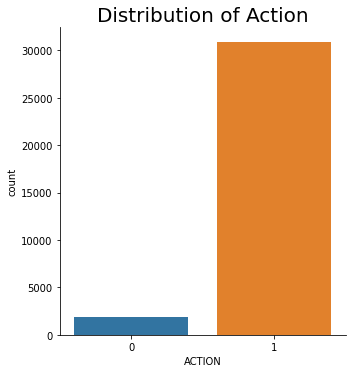

In [8]:
sns.catplot('ACTION', data = target, kind = 'count')
plt.title('Distribution of Action', size = 20)

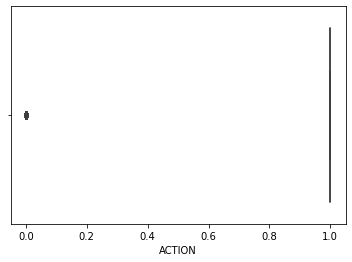

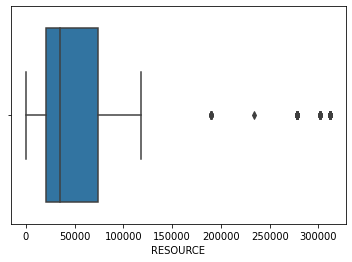

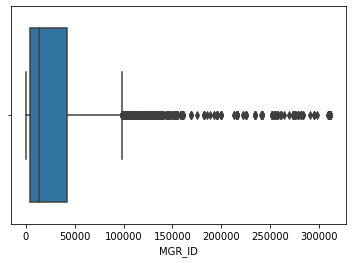

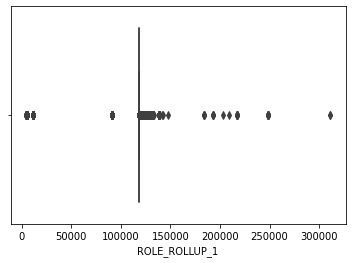

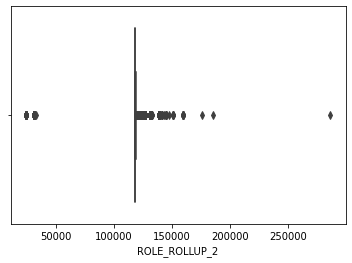

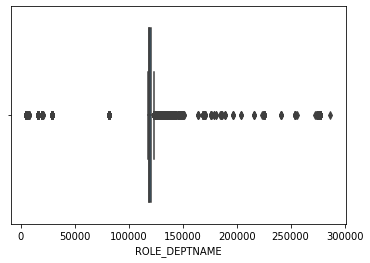

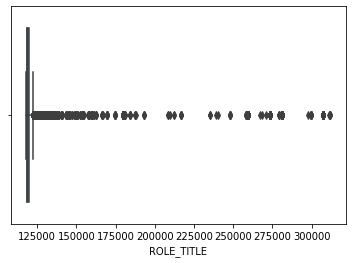

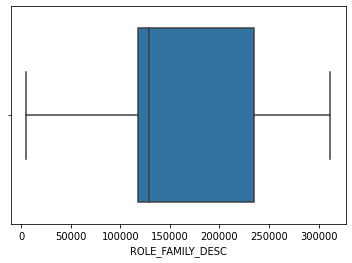

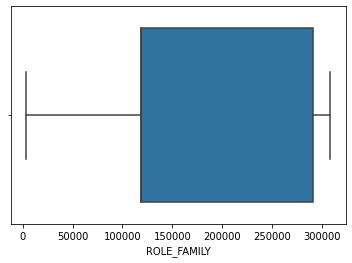

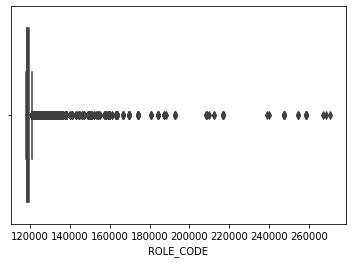

In [18]:
for i in train.describe().columns:
    sns.boxplot(train[i].dropna())
    plt.show()

In [9]:
train.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

In [10]:
train.isna().any()

ACTION              False
RESOURCE            False
MGR_ID              False
ROLE_ROLLUP_1       False
ROLE_ROLLUP_2       False
ROLE_DEPTNAME       False
ROLE_TITLE          False
ROLE_FAMILY_DESC    False
ROLE_FAMILY         False
ROLE_CODE           False
dtype: bool

In [11]:
X = train.iloc[:, 1:11].values
y = train.iloc[:, 0].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(n_estimators = 100, max_features = 3, oob_score=True)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_features=3, oob_score=True)

In [14]:
print(
"OOB accuracy is", 
classifier.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_train, classifier.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.9478161358001145 
 OOB Confusion Matrix 
      0      1
0  572    953
1  415  24275


In [15]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", classifier.score(X_test, y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(y_test, classifier.predict(X_test), labels=[0, 1]))
)

Test accuracy is 0.9490387549588037 
 Test Set Confusion Matrix 
      0     1
0  135   237
1   97  6085


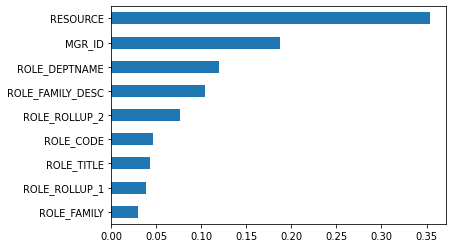

In [16]:
feat_importances = pd.Series(classifier.feature_importances_, index=train.drop('ACTION', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()